In [119]:

#### Working through numpy user guide: https://numpy.org/doc/stable/user/index.html

#### other resources:
# R/numpy function-by-function lookup  http://mathesaurus.sourceforge.net/r-numpy.html
# numpy cheatsheet                     http://datacamp-community-prod.s3.amazonaws.com/da466534-51fe-4c6d-b0cb-154f4782eb54
# all functions                        https://numpy.org/doc/stable/reference/index.html

3import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
data = np.array([[1, 2], [3, 4], [5, 6]])
print(data.shape)
print(data * 1.6)  # broadcasting
print(data.sum())
print(data.sum(axis = 1))  # axis=1 for value in each row' axis=0 for value in each column


(3, 2)
[[1.6 3.2]
 [4.8 6.4]
 [8.  9.6]]
21
[ 3  7 11]


In [27]:
print(np.ones(10).reshape(2, 5))   # make array of floats with value 1
print(np.zeros(10).reshape(2, 5)) 
print(np.zeros((2, 5)))       # does same as row above
 
rng = np.random.default_rng()    # make generator 
print(type(rng))
print(rng.random((2, 5)))      # call generator for decimals
print(rng.integers(5, size=(2, 5)))  # same generator for integers in range


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
<class 'numpy.random._generator.Generator'>
[[0.44401845 0.49811704 0.15905493 0.79422447 0.15034477]
 [0.86166961 0.33700331 0.565872   0.10156115 0.16293128]]
[[2 3 3 0 3]
 [2 3 2 4 2]]


In [46]:
unique_vals, freq = np.unique(rng.integers(5, size=(20)), return_counts = True)
print(unique_vals)
print(freq)        # frequency of each unique val

# can do unique by an axis
np.unique(rng.integers(1, size=(20, 20)), axis=1, return_counts = True)  # returns unique columns
np.unique(rng.integers(1, size=(20, 20)), axis=0, return_counts = True)  # returns unique rows


[0 1 2 3 4]
[4 5 4 6 1]


(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 array([20]))

In [57]:
arr = rng.random((10))
print(arr)
print(np.flip(arr))   # reverse order

arr2d = rng.random((4, 4))
print(arr2d)
print(np.flip(arr2d))
print(np.flip(arr2d, axis=1)) # reverse across each row
print(np.flip(arr2d, axis=0)) # reverse across each col

[0.57712059 0.75794152 0.25507263 0.6978059  0.59091526 0.72353232
 0.01423363 0.56215687 0.25762298 0.58215504]
[0.58215504 0.25762298 0.56215687 0.01423363 0.72353232 0.59091526
 0.6978059  0.25507263 0.75794152 0.57712059]
[[0.79773476 0.1069405  0.99083226 0.11425904]
 [0.53707927 0.81726735 0.60019299 0.67534119]
 [0.49079915 0.29326898 0.37293668 0.02796151]
 [0.36894505 0.77342984 0.07350921 0.38265242]]
[[0.38265242 0.07350921 0.77342984 0.36894505]
 [0.02796151 0.37293668 0.29326898 0.49079915]
 [0.67534119 0.60019299 0.81726735 0.53707927]
 [0.11425904 0.99083226 0.1069405  0.79773476]]
[[0.11425904 0.99083226 0.1069405  0.79773476]
 [0.67534119 0.60019299 0.81726735 0.53707927]
 [0.02796151 0.37293668 0.29326898 0.49079915]
 [0.38265242 0.07350921 0.77342984 0.36894505]]
[[0.36894505 0.77342984 0.07350921 0.38265242]
 [0.49079915 0.29326898 0.37293668 0.02796151]
 [0.53707927 0.81726735 0.60019299 0.67534119]
 [0.79773476 0.1069405  0.99083226 0.11425904]]


In [67]:
# flatten() and ravel() are similar, but obj made with ravel() is a view to the parent array, making
# ravel() more memory efficient, as it doesn't create a copy, and changes made to ravel()'d view are
# made to parent table too, unlike flatten()
arr2d = rng.random((4, 4))
print(arr2d.flatten())
arr2d.ravel()

[0.59462205 0.94403908 0.19852225 0.59515276 0.96699348 0.31117724
 0.34509215 0.10743127 0.00729901 0.35993498 0.16378857 0.63722212
 0.18882307 0.10205102 0.09393249 0.71885747]


0.125

In [76]:
def mse(prediction, actual):
    """example function: mean squared error"""
    if prediction.shape != actual.shape:
        raise ValueError("Data aren't same size!")
    n = prediction.shape[0] 
    return (1/n) * np.sum(np.square(prediction, actual))

prediction = rng.random(20)
actual = rng.random(20)
mse(prediction, actual)

0.31112121903903656

In [93]:
np.save('np_prediction.npy', prediction)   # save simple numpy obj
np.savez('np_predictions.npz', prediction,actual)  # save 1+ numpy objs in one file, note diffrent file names

tables_in = np.load('np_predictions.npz')

# use pandas to read csv and numpy to export

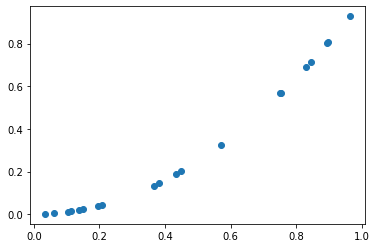

In [92]:
plt.scatter(prediction, actual)  # matplotlib accepts numpy arrays as args

In [144]:
# two (of many) options to bind columns
for_plot = np.vstack((prediction, actual)).T 
for_plot = np.hstack((prediction, actual)).reshape(prediction.shape[0], 2)
print(for_plot.shape)
print(type(for_plot))

(20, 2)
<class 'numpy.ndarray'>


In [112]:
print(for_plot.itemsize)  # size of each value in array in bytes
print(for_plot.size)   # total elements in array
print(for_plot.dtype) 
print(for_plot.ndim)  # total dimensions

8
40
float64
2


In [123]:
arr = np.arange(100, dtype = 'u1')   # make sequential array of 1-byte unsigned integers
print(arr.itemsize)
      
# according to this one byte is minimum obj size: 
# https://stackoverflow.com/questions/53999299/specifying-numpy-arrays-with-2-bit-dtype


# two ways of looking at object sizes: the sys method likely includes other things
print(sys.getsizeof(arr)  )
print(arr.nbytes)

1
196
100


In [134]:
## all of these do the matrix mult of two arrays
print(arr.dot(arr))
print(arr @ arr)
print(np.matmul(arr, arr))

# does element wise mult
(arr[:4] * arr[:4])

158
158
158


array([0, 1, 4, 9], dtype=uint8)

In [135]:
arr *= 2   # operates inplace
arr += 3  # inplace

In [139]:
np.linspace(0, np.pi * 2, 3)  # create evenly spaced sequence from a to b, of length c



array([0.        , 3.14159265, 6.28318531])

In [166]:
# Simple assignments make no copy of objects or their data.
a = np.arange(10, dtype = 'u1')
b = a   # b is a child of a
b[1] = 255  # changes a
print(a)

#### as a and b are linked in the above, a will stay in memory even if deleted, as it's needed by b


c = a.view()
print(c is a)
c = c.reshape((2, 5)) # doesnt change shape of a
print(a)
c[1, 1] = 100    # does change value of a: view still gives a link (like memoryviews in base python)
print(a)  

d = a.copy()   # not linked to a: this is a deep copy
d[1] = 0
print(a)


a = a.astype('u2')  # change dtype to 16bit integer
a[1] = 1625
print(a)


print(a.reshape(2, -1))  # -1 in reshape is a placeholder to be inferred according to "whatever makes it add up"

[  0 255   2   3   4   5   6   7   8   9]
False
[  0 255   2   3   4   5   6   7   8   9]
[  0 255   2   3   4   5 100   7   8   9]
[  0 255   2   3   4   5 100   7   8   9]
[   0 1625    2    3    4    5  100    7    8    9]


array([[   0, 1625,    2,    3,    4],
       [   5,  100,    7,    8,    9]], dtype=uint16)

In [ ]:
# numpy has about 40 different funcs for creating arrays - https://numpy.org/doc/stable/user/basics.creation.html


arr = np.array([1, 2, 3, 4], dtype='i4')  # making 4 byte integer
# for list of data types: https://www.w3schools.com/python/numpy/numpy_data_types.asp
# add a number after the letter signalling number of bytes to assign to each data type



In [ ]:
# broadcasting: happens in a loop in C
# broadcasting is best when both inputs have equal length or one has length=1
# OR, it might not work if one of those conditions isnt met

# says broadcasting can be inefficient in some circumstances (wastes memory), but
# doesnt say what those circumstances are
# ref: https://numpy.org/doc/stable/user/basics.broadcasting.html



In [ ]:
# endianness = order of bytes in comp memory for a particular object
# at this byte level, diffrent comps store the same high level obj (eg np array) as different byte 
# combinations if they have differnt endians.
# comps are often categorised as big or little endian, with differnt processes for how they store their bytes

# big endian = stores Most Significant Byte first
# little endian = stores Least Significant Byte first

# byteswapping involves changing arrays at the byte level
# https://numpy.org/doc/stable/user/basics.byteswapping.html

# can use numpy.ndarray.byteswap() to swap between big and little endian representations

In [188]:
# structured arrays = lets you have different named fields of different types
# mimics structs in C
# feels similar to named tuples in base python
# https://numpy.org/doc/stable/user/basics.rec.html

# tuple inputs and dtypes defined for each 
# setting dtypes is optional - I think it works better if you do
structured_array = np.array([('Adam', 17), ('Jo', 19)], dtype=[('name', 'U10'), ('age', 'i1')])

print(structured_array)   
print(structured_array[1]) 
print(structured_array['name'])
print(structured_array.dtype)


# assigning types without naming fields
structured_array = np.array([('Adam', 17), ('Jo', 19)], dtype='U10, i1')
print(structured_array)   

[('Adam', 17) ('Jo', 19)]
('Jo', 19)
['Adam' 'Jo']
[('name', '<U10'), ('age', 'i1')]
[('Adam', 17) ('Jo', 19)]


In [ ]:
# subclassing = inheriting 

In [216]:
print(np.nan)  # to assign nan
print(np.nan == np.nan)  # nan never equals itself
print(np.isnan(np.nan))  # use np.isnan to test for nan values

print(np.isinf(np.inf))  # infinite
print(np.isfinite(np.inf))  # true if not nan or inf
print(np.nan_to_num([9, 3, np.nan, np.nan]))  # make nan's 0

x =np.arange(10.)
x[3] = np.nan
print(np.nanargmax(x)) # ignores nan values
print(np.nansum(x))   # ignores nan's
# more funcs that ignore nan's https://numpy.org/doc/stable/user/misc.html


print(np.int8(127))  # make single value of signed int8

nan
False
True
True
False
[9. 3. 0. 0.]
9
42.0


127